# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
from scipy import stats;
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean = 50, standard_deviation = 5 and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [2]:
# Variables
mu = 50;
sigma = 5;
sample_size = [10, 50, 500, 5000]

# Distributions & Tests
dists = [np.random.normal(mu, sigma, size) for size in sample_size]
tests = [stats.normaltest(dist) for dist in dists]

# Show tests
tests

C:\Users\carlo\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


[NormaltestResult(statistic=0.13720603458592612, pvalue=0.933697268183877),
 NormaltestResult(statistic=0.7293506169677585, pvalue=0.6944220872376945),
 NormaltestResult(statistic=2.350197085851114, pvalue=0.30878854926167015),
 NormaltestResult(statistic=0.5559454432974114, pvalue=0.7573174796048249)]

#### Interpret the normaltest results and make your observations

In [3]:
# The more we increase the sample size, the more normal the distribution gets

`Comments:`


#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](images/ch-1.png)

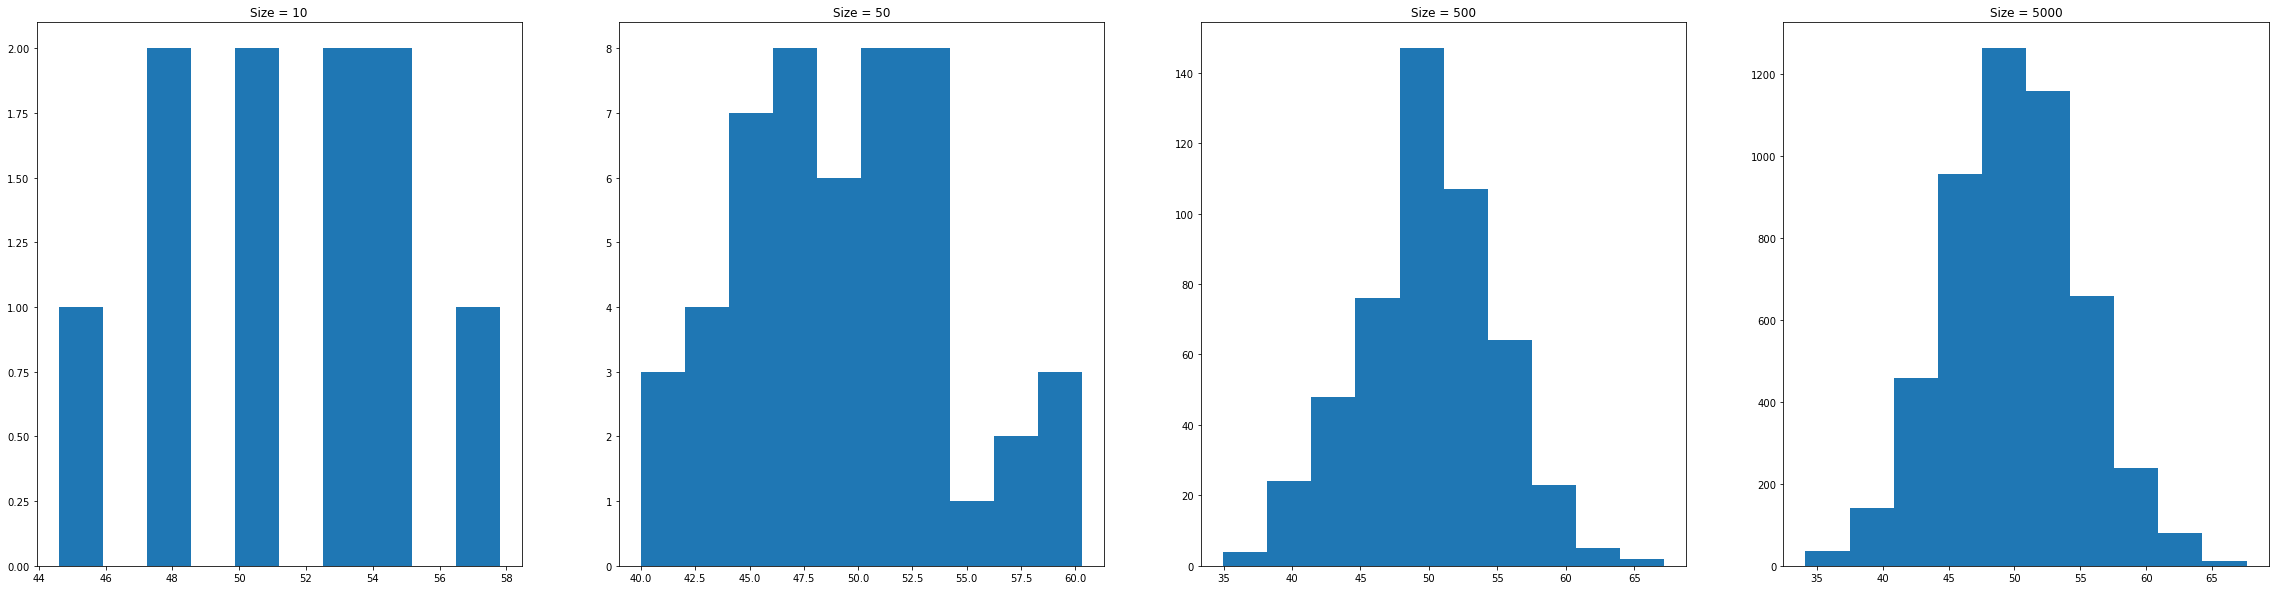

In [4]:
# Create figure and axes

fig, ax = plt.subplots(1,4, figsize=(40,10))

# Plot each histogram

_ = ax[0].hist(dists[0], bins=10)
_ = ax[1].hist(dists[1], bins=10)
_ = ax[2].hist(dists[2], bins=10)
_ = ax[3].hist(dists[3], bins=10)

_ = ax[0].set_title('Size = 10')
_ = ax[1].set_title('Size = 50')
_ = ax[2].set_title('Size = 500')
_ = ax[3].set_title('Size = 5000')

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

`Comments:`


# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who watched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](images/ch-2.png)

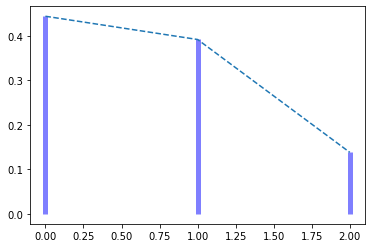

In [5]:
# Variables 
N = 5
p = 0.15

# Binomial distribution
x = np.arange(stats.binom(N,p).ppf(0.01), stats.binom(N,p).ppf(0.99)) # range of x axis
pmf = stats.binom(N,p).pmf(x) # product mass function based on the range

# Plot line + bullet point -> Discrete Distribution Representation
plt.plot(x, pmf, '--')
plt.vlines(x, 0, pmf, colors='b', lw=5, alpha=0.5)

#### Explain what you observe from the plot above.

`Comments:`



In [6]:
stats.binom(N,p).pmf(x)

# There is a probability of around 45% that 0 people will see the ad
# There is a probability of around 40% that 1 person will see the ad
# There is a probability of around 15% that 2 people will see the ad

array([0.44370531, 0.39150469, 0.13817812])

#### Now plot PMP with 50, 500, and 5000 visitors.

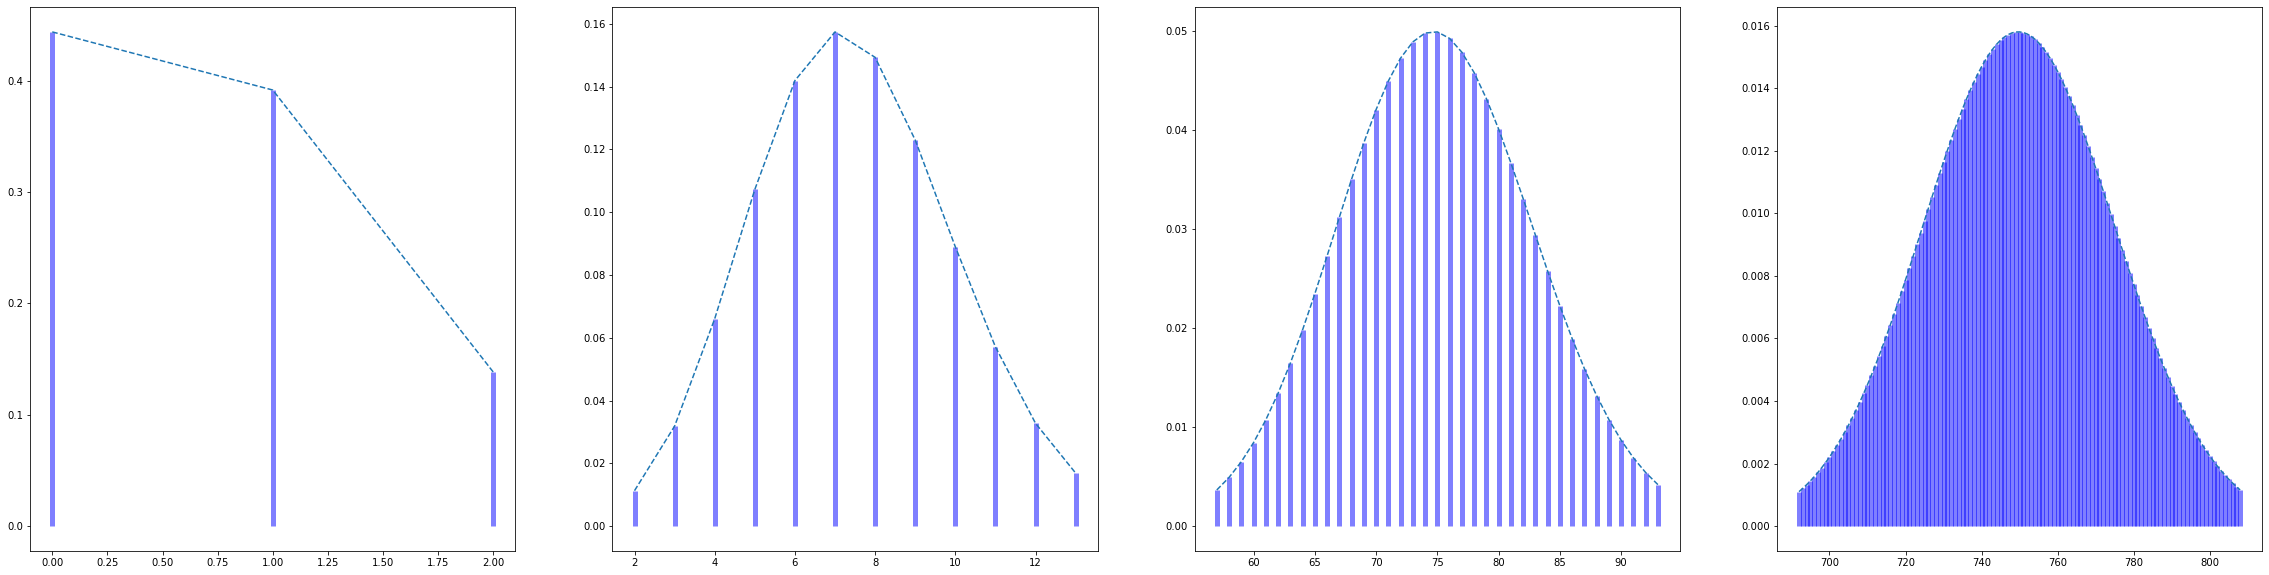

In [7]:
# Create figure and axes
fig, ax = plt.subplots(1,4, figsize=(40,10))

# Variables
N = [5, 50, 500, 5000]
p = 0.15

# Plot each PMF
for j,i in enumerate(N):
    x = np.arange(stats.binom(i,p).ppf(0.01), stats.binom(i,p).ppf(0.99))
    pmf = stats.binom(i,p).pmf(x)
    ax[j].plot(x, pmf, '--')
    ax[j].vlines(x, 0, pmf, colors='b', lw=5, alpha=0.5)    


#### What did you notice from the distribution plots? Comment your findings.

`Comments:`


In [8]:
# the bigger the size, the more normal the distribution
# the bigger the size, the more distributed the probabilities are, then the distributtion gets widder and lower

C:\Users\carlo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\carlo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\carlo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

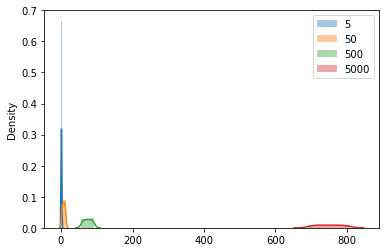

In [9]:
import seaborn as sns

for j,i in enumerate(N):
    x = np.arange(stats.binom(i,p).ppf(0.01), stats.binom(i,p).ppf(0.99))
    pmf = stats.binom(i,p).pmf(x)
    sns.distplot(x, label = i)
    
plt.legend()

# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

`Comments:`<br/>


#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [10]:
# Variables
mu = 300
visits = 320

# Probability
stats.poisson(mu).pmf(visits)

0.011612348610402475

#### What is the probability of getting 60 visits?

In [11]:
# Variables
visits = 60

# Probability
stats.poisson(mu).pmf(visits)

2.622743762294515e-64

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](images/ch-3.png)

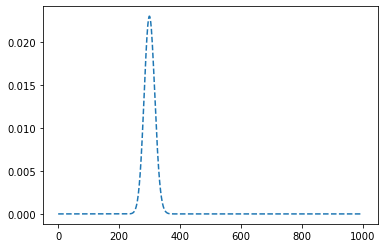

In [12]:
# Variables
visits = range(1000)

# Plot of the distribution
probs = stats.poisson(mu).pmf(visits)
plt.plot(visits, probs, '--')

# Challenge 4 - Central Limit Theorem
#### Example of application

A delivery company needs 35 minutes to deliver a package, with a standard deviation of 8 minutes. Suppose that in one day, they deliver 200 packages.

#### a. What is the probability that the mean delivery time today is between 30 and 35 minutes?

In [13]:
# Variables
mean = 35
std = 8
size = 200
distribution = stats.norm(mean,std).rvs(size)

# Probability - subtract the survival function
more_30 = stats.norm(distribution.mean(),distribution.std()).cdf(30)
more_35 = stats.norm(distribution.mean(),distribution.std()).cdf(35)

#### b. What is the probability that in total, it takes more than 115 hours to deliver all 200 packages?

In [14]:
# Variables
mu = distribution.mean()*200 / 60
mu_2 = 115

# Probability - survival function
stats.poisson(mu).sf(mu_2)

0.6208181774087873

# Challenge 5 - Normal Variables 

The value (in thousands) of the monthly sales of a publishing company follows a normal distribution with a mean equal to 200 and a standard deviation equal to 40. 

<div align="center">$X → N(200,40)$</div>

#### 1. Find the probability that the monthly sales are more than 300. 

In [15]:
# Variables
mu = 200
sigma = 40

# Probability - survival function
stats.norm(200,40).sf(300)

0.006209665325776132

#### 2. Find the probability that the monthly sales fall between 160 and 240.

In [16]:
# Probability  - subtract the survival function
stats.norm(200,40).cdf(240) - stats.norm(200,40).cdf(160)

# in a normal distribution, mean +- 1 std encompasses the 68% of the total observation

0.6826894921370859

#### 3. Find the probability that the monthly sales do not exceed 150.

In [17]:
# Probability - cumulative distribution function
stats.norm(200,40).cdf(150)

0.10564977366685535

#### 4. Find the probability that the monthly sales exceed 3000. 

In [18]:
# Probability - survival function
stats.norm(200,40).sf(3000)

0.0

# Challenge 6 - Poisson distribution
The mean number of violent robberies per month that are registered in a particular barrio is 4. Find the following probabilities.
#### 1.The probability that in a particular month there is no violent robbery.

In [19]:
# Variables
mu = 4

# Probability - pmf
stats.poisson(mu).pmf(0)

0.01831563888873418

#### 2. The probability that there are at least 1 in a given month. 

In [22]:
# Probability- survival function
stats.poisson(mu).sf(1)

0.9084218055563291

#### 3. The probability that there are between 2 and 6 (inclusive) in a given month.

In [23]:
# Probability
stats.poisson(mu).cdf(6) - stats.poisson(mu).cdf(2)

0.6512227160438819

#### 4. The probability that there more than two in 15 days.  

In [24]:
# Probability
# Morre than 2 in 15 days means more than 4 in one month
stats.poisson(mu).sf(4)

0.3711630648201266